In [1]:
#@title Imports & setup (run this first)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

# **Decision Trees**

Tree-based methods are simple and useful for interpretation.
Decision trees can be applied to both regression and classification problems.

# A) Regression Trees


## **Example 1**: Predicting Baseball Player Salary
In this guided example, you'll fit **Decision Tree Regressors** to predict MLB player **Salary** using only two features:
- `Years` — number of years in the major leagues
- `Hits` — number of hits in the previous year

We'll use the classic **Hitters** dataset (from *ISLR*), focusing on these two predictors.

<img src="https://upload.wikimedia.org/wikipedia/de/thumb/7/7a/Major-League-Baseball-Logo.svg/1200px-Major-League-Baseball-Logo.svg.png" height=200>

In [2]:
#@title 1) Load the dataset (Hitters)

# Try to load the Hitters dataset from a public mirror
url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Hitters.csv"
df_raw = pd.read_csv(url)
df_raw.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:

# Keep only the three columns we need
df = df_raw[["Years", "Hits", "Salary"]].copy()

# we'll drop rows with missing salaries.
df = df.dropna(subset=["Salary"]).reset_index(drop=True)

df.head()

,Years,Hits,Salary
0,14,81,475.0
1,3,130,480.0
2,11,141,500.0
3,2,87,91.5
4,11,169,750.0


In [4]:
# Quick EDA
display(df.describe())

,Years,Hits,Salary
count,263.000000,263.000000,263.000000
mean,7.311787,107.828897,535.925882
std,4.793616,45.125326,451.118681
min,1.000000,1.000000,67.500000
25%,4.000000,71.500000,190.000000
50%,6.000000,103.000000,425.000000
75%,10.000000,141.500000,750.000000
max,24.000000,238.000000,2460.000000


In [5]:
display(df[["Years", "Hits", "Salary"]].corr())

,Years,Hits,Salary
Years,1.000000,0.018598,0.400657
Hits,0.018598,1.000000,0.438675
Salary,0.400657,0.438675,1.000000


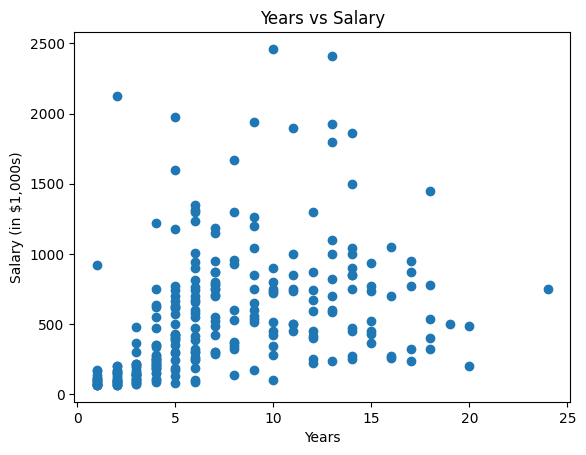

In [6]:
# Years vs Salary
plt.figure()
plt.scatter(df["Years"], df["Salary"])
plt.title("Years vs Salary")
plt.xlabel("Years")
plt.ylabel("Salary (in $1,000s)")
plt.show()

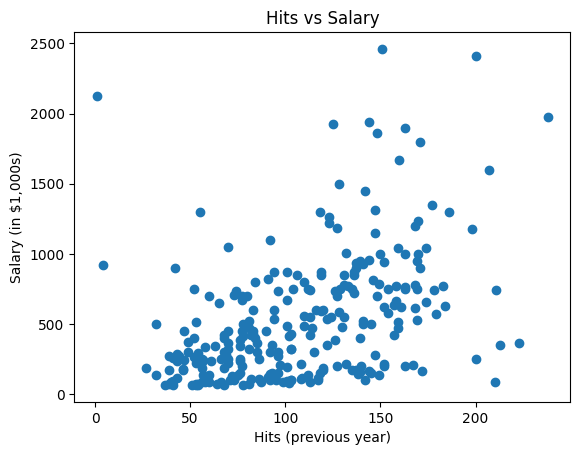

In [7]:

# Hits vs Salary
plt.figure()
plt.scatter(df["Hits"], df["Salary"])
plt.title("Hits vs Salary")
plt.xlabel("Hits (previous year)")
plt.ylabel("Salary (in $1,000s)")
plt.show()


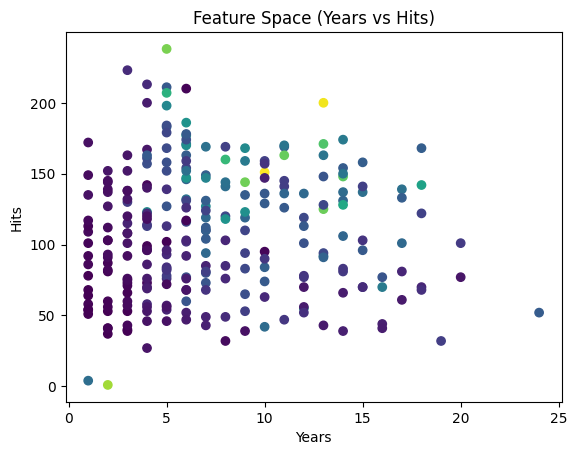

In [8]:
# 2D feature space: Years vs Hits (size ~ Salary)
plt.figure()
plt.scatter(df["Years"], df["Hits"], c=df["Salary"])
plt.title("Feature Space (Years vs Hits)")
plt.xlabel("Years")
plt.ylabel("Hits")
plt.show()

In [9]:
#@title ## 2) Train/Test split
X = df[["Years", "Hits"]].values
y = df["Salary"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

X_train.shape, X_test.shape


((131, 2), (132, 2))

In [14]:
dt_base = DecisionTreeRegressor(random_state=42)
dt_base.fit(X_train, y_train)

y_te_pred = dt_base.predict(X_test)

print("Baseline Decision Tree Regressor")
print("-"*32)
print("Test MSE: %.3f" % ( mean_squared_error(y_test, y_te_pred)))


Baseline Decision Tree Regressor
--------------------------------
Test MSE: 193964.206


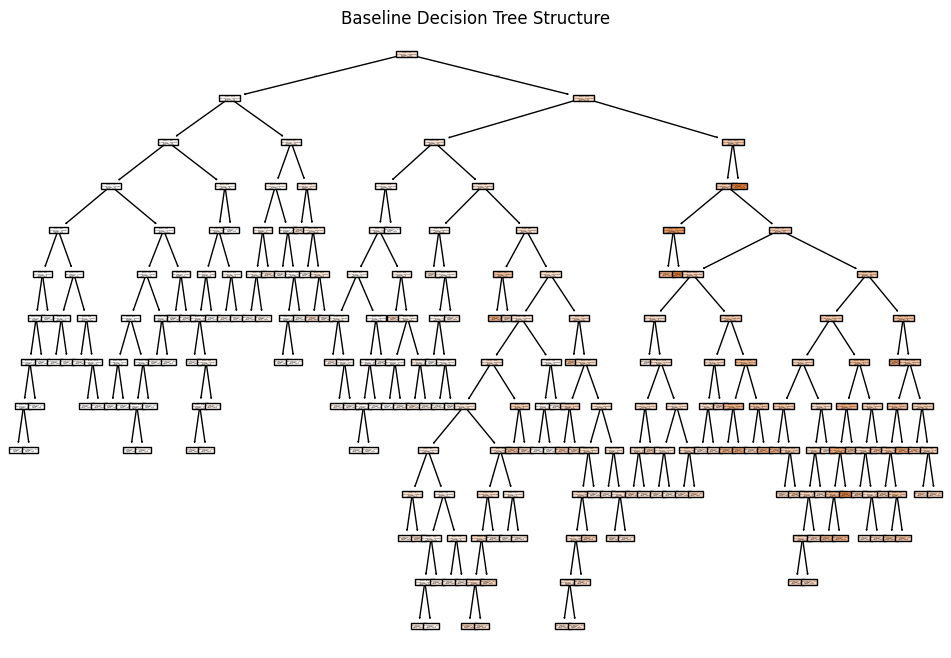

In [15]:
# Visualize the learned tree
plt.figure(figsize=(12, 8))
plot_tree(dt_base, feature_names=["Years", "Hits"], filled=True)
plt.title("Baseline Decision Tree Structure")
plt.show()

In [18]:
#@title Hyperparameter exploration

# max_depth
for max_depth in [3, 5, 10, 20]:
  dt_max_depth = DecisionTreeRegressor(random_state=42, max_depth=max_depth)
  dt_max_depth.fit(X_train, y_train)

  y_pred = dt_max_depth.predict(X_test)
  print("Test MSE: max_depth=%.f %.3f" % (max_depth, mean_squared_error(y_test, y_pred)))


Test MSE: max_depth=3 152202.363
Test MSE: max_depth=5 161751.576
Test MSE: max_depth=10 195905.586
Test MSE: max_depth=20 193964.206


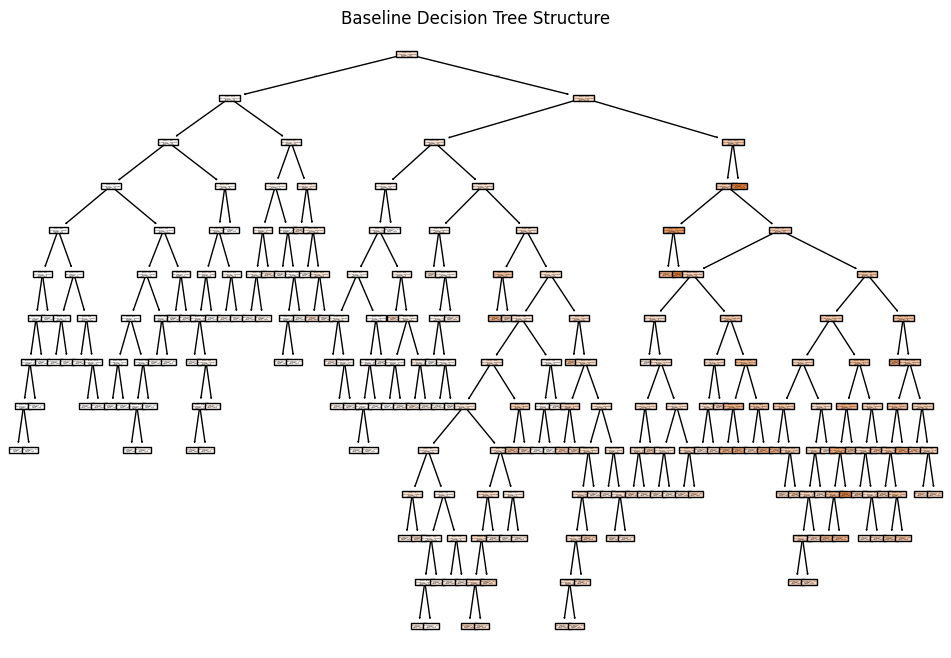

In [19]:
dt_base = DecisionTreeRegressor(max_depth=30, random_state=42)
dt_base.fit(X_train, y_train)

y_te_pred = dt_base.predict(X_test)
# Visualize the learned tree
plt.figure(figsize=(12, 8))
plot_tree(dt_base, feature_names=["Years", "Hits"], filled=True)
plt.title("Baseline Decision Tree Structure")
plt.show()

In [20]:
# max_depth with cross validation
for max_depth in [1, 2, 3, 4, 5, 6, 10, 20]:
  dt_max_depth = DecisionTreeRegressor(random_state=42, max_depth=max_depth)
  neg_mse = cross_val_score(dt_max_depth, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
  rmse_scores = np.sqrt(-neg_mse)
  print("Test MSE with 'max_depth'=%.0f: %.3f" % (max_depth, rmse_scores.mean()))


Test MSE with 'max_depth'=1: 363.091
Test MSE with 'max_depth'=2: 284.015
Test MSE with 'max_depth'=3: 271.268
Test MSE with 'max_depth'=4: 289.401
Test MSE with 'max_depth'=5: 308.761
Test MSE with 'max_depth'=6: 329.025
Test MSE with 'max_depth'=10: 348.280
Test MSE with 'max_depth'=20: 346.071


`min_samples_split` int or float, default=2
The minimum number of samples required to split an internal node:

- If int, then consider `min_samples_split` as the minimum number.

- If float, then min_samples_split is a fraction and ceil(`min_samples_split` * `n_samples`) are the minimum number of samples for each split.

In [21]:
split_vals = [2, 5, 10, 20, 40, 0.01, 0.02, 0.05, 0.1]
cv_scores_split = []

for s in split_vals:
    model = DecisionTreeRegressor(min_samples_split=s, random_state=42)
    neg_mse = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-neg_mse)
    print("Test MSE with 'min_samples_split'=%.0f: %.3f" % (s, rmse_scores.mean()))

Test MSE with 'min_samples_split'=2: 346.071
Test MSE with 'min_samples_split'=5: 329.193
Test MSE with 'min_samples_split'=10: 340.865
Test MSE with 'min_samples_split'=20: 306.493
Test MSE with 'min_samples_split'=40: 298.179
Test MSE with 'min_samples_split'=0: 346.071
Test MSE with 'min_samples_split'=0: 340.955
Test MSE with 'min_samples_split'=0: 332.363
Test MSE with 'min_samples_split'=0: 338.953


In [22]:
split_vals = [2, 5, 10, 20, 40, 0.01, 0.02, 0.05, 0.1]
cv_scores_split = []

for s in split_vals:
    model = DecisionTreeRegressor(min_samples_split=s, max_depth=3, random_state=42)
    neg_mse = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-neg_mse)
    print("Test MSE with 'min_samples_split'=%.03f: %.3f" % (s, rmse_scores.mean()))

Test MSE with 'min_samples_split'=2.000: 271.268
Test MSE with 'min_samples_split'=5.000: 271.268
Test MSE with 'min_samples_split'=10.000: 268.308
Test MSE with 'min_samples_split'=20.000: 273.160
Test MSE with 'min_samples_split'=40.000: 298.179
Test MSE with 'min_samples_split'=0.010: 271.268
Test MSE with 'min_samples_split'=0.020: 271.268
Test MSE with 'min_samples_split'=0.050: 271.268
Test MSE with 'min_samples_split'=0.100: 266.500


`min_samples_leaf` * int or float, default=1*

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

*   If int, then consider `min_samples_leaf` as the minimum number.
*   If float, then `min_samples_leaf` is a fraction and ceil(`min_samples_leaf * n_samples`) are the minimum number of samples for each node.





In [23]:
leaf_vals = [1, 2, 3, 5, 10, 20, 0.01, 0.02, 0.05, 0.1]
# max_depth
for leaf_val in leaf_vals:
  model = DecisionTreeRegressor(min_samples_leaf=leaf_val, random_state=42)
  neg_mse = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
  rmse_scores = np.sqrt(-neg_mse)
  print("Test MSE with 'min_samples_leaf'=%.0f: %.3f" % (leaf_val, rmse_scores.mean()))


Test MSE with 'min_samples_leaf'=1: 346.071
Test MSE with 'min_samples_leaf'=2: 343.037
Test MSE with 'min_samples_leaf'=3: 348.416
Test MSE with 'min_samples_leaf'=5: 319.354
Test MSE with 'min_samples_leaf'=10: 311.184
Test MSE with 'min_samples_leaf'=20: 301.028
Test MSE with 'min_samples_leaf'=0: 343.037
Test MSE with 'min_samples_leaf'=0: 348.416
Test MSE with 'min_samples_leaf'=0: 313.925
Test MSE with 'min_samples_leaf'=0: 313.412


In [24]:
leaf_vals = [1, 2, 3, 5, 10, 20, 0.01, 0.02, 0.05, 0.1]
# max_depth
for leaf_val in leaf_vals:
  model = DecisionTreeRegressor(min_samples_leaf=leaf_val, max_depth=3, min_samples_split=0.1, random_state=42)
  neg_mse = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
  rmse_scores = np.sqrt(-neg_mse)
  print("Test MSE with 'min_samples_leaf'=%.3f: %.3f" % (leaf_val, rmse_scores.mean()))

Test MSE with 'min_samples_leaf'=1.000: 266.500
Test MSE with 'min_samples_leaf'=2.000: 281.053
Test MSE with 'min_samples_leaf'=3.000: 290.296
Test MSE with 'min_samples_leaf'=5.000: 295.334
Test MSE with 'min_samples_leaf'=10.000: 308.772
Test MSE with 'min_samples_leaf'=20.000: 301.028
Test MSE with 'min_samples_leaf'=0.010: 281.053
Test MSE with 'min_samples_leaf'=0.020: 290.296
Test MSE with 'min_samples_leaf'=0.050: 295.480
Test MSE with 'min_samples_leaf'=0.100: 312.291


`max_features` int, float or {“sqrt”, “log2”}, default=None

The number of features to consider when looking for the best split:

- If int, then consider `max_features` features at each split.

- If float, then max_features is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.

- If “sqrt”, then `max_features=sqrt(n_features)`.

- If “log2”, then `max_features=log2(n_features)`.

- If None, then `max_features=n_features`.

## 🏠 **Exercise:** Predicting House Prices with Decision Tree Regression
We will now apply Decision Tree Regression to the Boston Housing (a.k.a. “Housing in Boston/Houston”) dataset, which is available in `sklearn.datasets` (via `fetch_california_housing` or from UCI repos).

**The goal is to predict house prices based on various neighborhood and property attributes.**

In [ ]:
print(fetch_california_housing().DESCR)

In [ ]:
cal = fetch_california_housing(as_frame=True)
X = cal.data  # features
y = cal.target  # MedHouseVal

print("Features:", list(X.columns))
print("Shape:", X.shape, "| Target shape:", y.shape)
X.head()

---
# B) Classification Trees

## **Example 2**: Binary Classification with DT (Banknote Authentication)

<img src="https://www.neuraldesigner.com/images/banknote-authentication.webp" height=200>

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0925231213003202-gr6.jpg" height=200>

[Image 1 Source](https://www.neuraldesigner.com/blog/banknote-authentication/),
[Image 2 Source](https://www.sciencedirect.com/science/article/abs/pii/S0925231213003202)

In [25]:
#@title **1) Load the dataset**

bank_data = pd.read_csv('banknotes.csv')
bank_data.head()

,variance,skewness,curtosis,entropy,class
0,-0.89569,3.00250,-3.606700,-3.44570,1
1,3.47690,-0.15314,2.530000,2.44950,0
2,3.91020,6.06500,-2.453400,-0.68234,0
3,0.60731,3.95440,-4.772000,-4.48530,1
4,2.37180,7.49080,0.015989,-1.74140,0


In [26]:
# Prepare predictors and target
X = bank_data.drop('class', axis=1)
y = bank_data['class']

# Peek at the data
print("Shape:", X.shape)
X.head()

Shape: (1372, 4)


,variance,skewness,curtosis,entropy
0,-0.89569,3.00250,-3.606700,-3.44570
1,3.47690,-0.15314,2.530000,2.44950
2,3.91020,6.06500,-2.453400,-0.68234
3,0.60731,3.95440,-4.772000,-4.48530
4,2.37180,7.49080,0.015989,-1.74140


In [27]:
#@title **2) Split the dataset into train/test datasets**

# Keep the test set aside for **final** evaluation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1097, 4), (275, 4))

In [29]:
#@title **3) Train a Baseline Decision Tree (default settings)**

dt_baseline = DecisionTreeClassifier(random_state=42)
dt_baseline.fit(X_train, y_train)

# Evaluate on test set
y_pred_test = dt_baseline.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print(f"Baseline Test Accuracy: {acc_test:.4f}")
print("\nClassification report (test):\n")
print(classification_report(y_test, y_pred_test, target_names=["Fake","Genuine"]))

Baseline Test Accuracy: 0.9782

Classification report (test):

              precision    recall  f1-score   support

        Fake       0.97      0.99      0.98       145
     Genuine       0.99      0.96      0.98       130

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="")


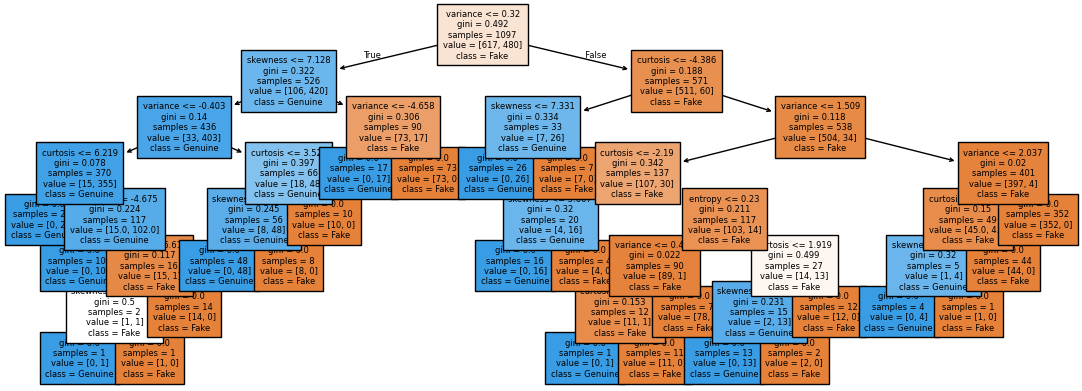

In [30]:
#@title **4) Print the Decision Tree**
fig = plt.figure(figsize=plt.figaspect(0.35))
ax = fig.add_subplot(1, 1, 1)
plot_tree(dt_baseline,
          filled=True,
          class_names=["Fake","Genuine"],
          feature_names=X.columns,
          ax=ax,
          fontsize=6)
plt.show()

In [31]:
#@title **5) Feature importance**

importances = pd.Series(dt_baseline.feature_importances_, index=X.columns).sort_values(ascending=False)
importances


,0
variance,0.567711
skewness,0.263333
curtosis,0.151936
entropy,0.017021


---
# **Exercise** - Cancer Classification Using Decision Trees

Let's try to use DTs to diagnose (breast) cancer patients. Further, let us investigate how various settings impact the performance.

- Load and inspect a real medical dataset.
- Build a baseline Decision Tree classifier (with default settings).
- Evaluate performance (accuracy, confusion matrix, precision/recall/F1).
- Explore how different hyperparameters affect performance:
  - `max_depth` (integer or `None`)
  - `min_samples_split` (integer or fraction)
  - `min_samples_leaf` (integer or fraction)
  - `max_features` (integer, fraction, `"sqrt"`, `"log2"`, or `None`)  

![What does breast cancer look like on mammography](https://healthimaging.com/sites/default/files/styles/gallery/public/2022-09/Series%20on%20annual%20mammograms%20showing%20cancer%20formation_RSNA.jpg.webp?itok=7rAqFvmS)

[image source](https://healthimaging.com/topics/medical-imaging/womens-imaging/breast-imaging/photo-gallery-what-does-breast-cancer-look-mammography)

In [32]:
#@title  1) Load & explore the dataset
# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Peek at the data
print("Shape:", X.shape)
X.head()


Shape: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
# Class distribution
y.value_counts(normalize=True).rename(index={0:"malignant", 1:"benign"})

,proportion
target,
benign,0.627417
malignant,0.372583


In [34]:
#@title 2) Create a train/test split

# Keep the test set aside for **final** evaluation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((455, 30), (114, 30))

In [35]:
#@title 3) Baseline Decision Tree (default settings)

dt_baseline = DecisionTreeClassifier(random_state=42)
dt_baseline.fit(X_train, y_train)

# Evaluate on test set
y_pred_test = dt_baseline.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print(f"Baseline Test Accuracy: {acc_test:.4f}")
print("\nClassification report (test):\n")
print(classification_report(y_test, y_pred_test, target_names=["malignant","benign"]))

Baseline Test Accuracy: 0.9474

Classification report (test):

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



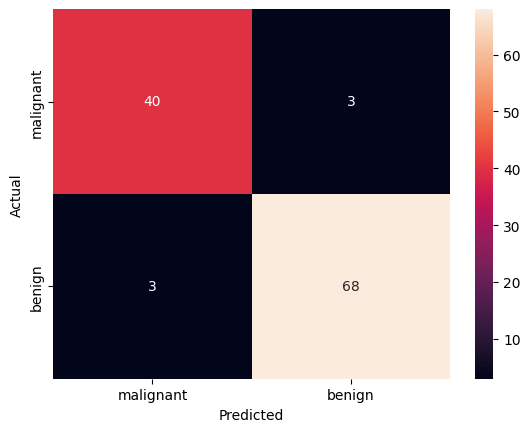

In [36]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
classes = ["malignant","benign"]
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes)

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

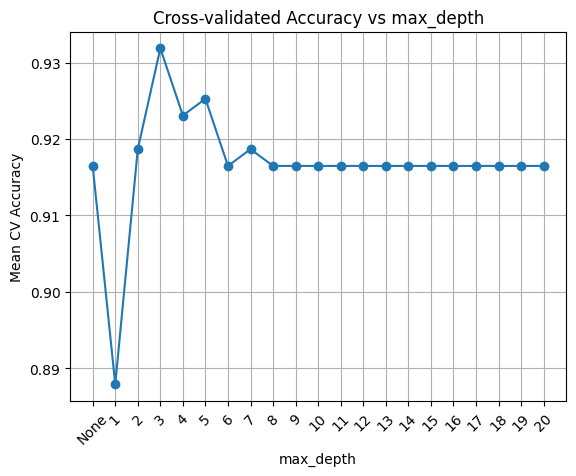

Best max_depth by CV: 3 with mean accuracy: 0.9319


In [37]:
depth_values = [None] + list(range(1, 21))  # None means expand until all leaves are pure or min_samples constraints are met
cv_means = []

for d in depth_values:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    cv_means.append(scores.mean())

# Plot
plt.figure()
plt.plot([str(d) for d in depth_values], cv_means, marker="o")
plt.title("Cross-validated Accuracy vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("Mean CV Accuracy")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

best_idx = int(np.argmax(cv_means))
best_depth = depth_values[best_idx]
print("Best max_depth by CV:", best_depth, "with mean accuracy:", f"{cv_means[best_idx]:.4f}")

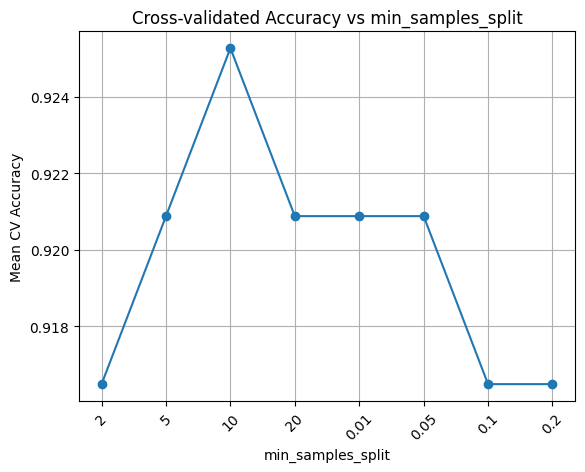

Best min_samples_split by CV: 10 with mean accuracy: 0.9253


In [38]:
split_values = [2, 5, 10, 20, 0.01, 0.05, 0.1, 0.2]
cv_means_split = []

for s in split_values:
    clf = DecisionTreeClassifier(min_samples_split=s, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    cv_means_split.append(scores.mean())

plt.figure()
plt.plot([str(s) for s in split_values], cv_means_split, marker="o")
plt.title("Cross-validated Accuracy vs min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("Mean CV Accuracy")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

best_idx = int(np.argmax(cv_means_split))
print("Best min_samples_split by CV:", split_values[best_idx], "with mean accuracy:", f"{cv_means_split[best_idx]:.4f}")

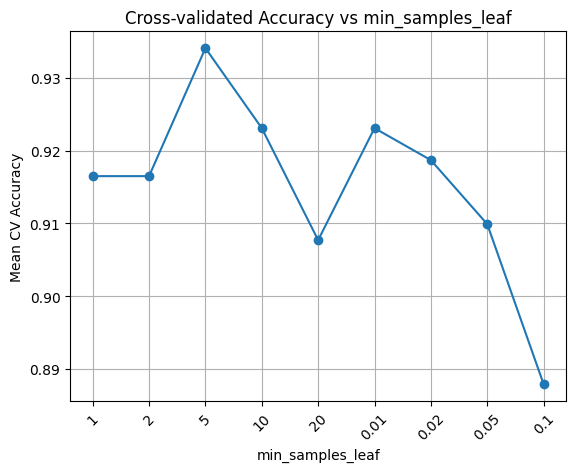

Best min_samples_leaf by CV: 5 with mean accuracy: 0.9341


In [39]:

leaf_values = [1, 2, 5, 10, 20, 0.01, 0.02, 0.05, 0.1]
cv_means_leaf = []

for l in leaf_values:
    clf = DecisionTreeClassifier(min_samples_leaf=l, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    cv_means_leaf.append(scores.mean())

plt.figure()
plt.plot([str(l) for l in leaf_values], cv_means_leaf, marker="o")
plt.title("Cross-validated Accuracy vs min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("Mean CV Accuracy")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

best_idx = int(np.argmax(cv_means_leaf))
print("Best min_samples_leaf by CV:", leaf_values[best_idx], "with mean accuracy:", f"{cv_means_leaf[best_idx]:.4f}")


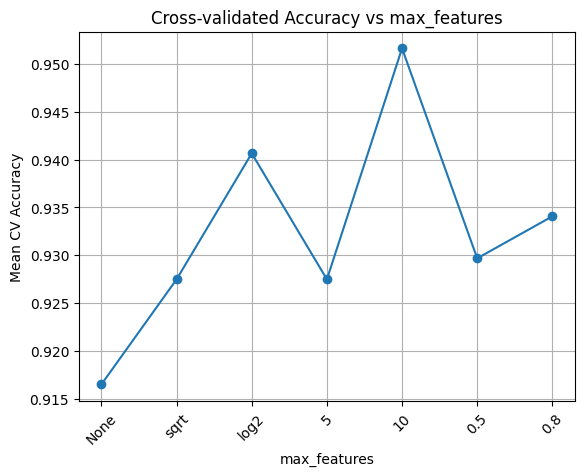

Best max_features by CV: 10 with mean accuracy: 0.9516


In [40]:

feature_settings = [None, "sqrt", "log2", 5, 10, 0.5, 0.8]
cv_means_feats = []

for f in feature_settings:
    clf = DecisionTreeClassifier(max_features=f, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    cv_means_feats.append(scores.mean())

plt.figure()
plt.plot([str(f) for f in feature_settings], cv_means_feats, marker="o")
plt.title("Cross-validated Accuracy vs max_features")
plt.xlabel("max_features")
plt.ylabel("Mean CV Accuracy")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

best_idx = int(np.argmax(cv_means_feats))
print("Best max_features by CV:", feature_settings[best_idx], "with mean accuracy:", f"{cv_means_feats[best_idx]:.4f}")


In [ ]:
from sklearn.model_selection import GridSearchCV

tree_para = {
    'criterion':['gini','entropy'],
    'max_depth': list(range(3, 30)),
    'min_samples_leaf': [1, 2, 5, 10, 20, 0.01, 0.02, 0.05, 0.1],
    'max_features': [None, "sqrt", "log2", 5, 10, 0.5, 0.8],
    'min_samples_split': [2, 5, 10, 20, 0.01, 0.05, 0.1, 0.2]
    }
clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=tree_para,
                   cv=5,
                   scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)

In [ ]:
# 👉 TODO: Replace these with the values you consider best from the sweeps above
best_params = {'criterion': 'entropy', 'max_depth': 9, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10}

dt_final = DecisionTreeClassifier(random_state=42, **best_params)
dt_final.fit(X_train, y_train)

y_pred_test_final = dt_final.predict(X_test)
acc_test_final = accuracy_score(y_test, y_pred_test_final)
print("Final Test Accuracy:", f"{acc_test_final:.4f}")
print("\nClassification report (test):\n")
print(classification_report(y_test, y_pred_test_final, target_names=["malignant","benign"]))

# Confusion Matrix for final model
cm_final = confusion_matrix(y_test, y_pred_test_final)

plt.figure()
plt.imshow(cm_final, interpolation='nearest')
plt.title("Final Model: Confusion Matrix (Test)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.xticks([0,1], ["malignant","benign"])
plt.yticks([0,1], ["malignant","benign"])
for i in range(cm_final.shape[0]):
    for j in range(cm_final.shape[1]):
        plt.text(j, i, cm_final[i, j], ha="center", va="center")
plt.show()

In [ ]:

importances = pd.Series(dt_final.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 10))
importances.iloc[:20].plot(kind="barh")
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

importances.head(10)


In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.35))
ax = fig.add_subplot(1, 1, 1)
plot_tree(dt_final, filled=True, class_names=["malignant","benign"],
               feature_names=data.feature_names, ax=ax, fontsize=6)
plt.show()